## Assignment 1: Logistic Regression 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

import numpy as np
import pandas as pd

### Import digits data set from Scikitlearn datasets library. Use load_digits(). When loaded, the dataset comes with data and target values.
### Assign data to X and target to y
### Check the shape of the data

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

print(f"Shape of X: {X.shape}\n\nShape of y: {y.shape}")

Shape of X: (1797, 64)

Shape of y: (1797,)


### Use np.bincount to print the number of uniqe elements of the target vriable y

In [3]:
unique_counts = np.bincount(y)

print(f'Unique counts of each element in y: {unique_counts}')

Unique counts of each element in y: [178 182 177 183 181 182 181 179 174 180]


### Split data into train and test datasets. Use stratification when splitting. You can set your random_state to 42

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with stratification and random_state
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42
                                                   )

# Check the shape of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1437, 64) (1437,)
Test set shape: (360, 64) (360,)


### Normalize your dataset. When normalizing, simply divide your dataset by the maximum of the train dataset. To find the maximum, use `max(

In [5]:
# Calculate the maximum value of the training dataset
max_value = X_train.max()

# Normalize the training and test datasets by dividing by the maximum value
X_train_normalized = X_train / max_value
X_test_normalized = X_test / max_value

# Check the maximum value to ensure normalization
print("Max value in normalized X_train:", X_train_normalized.max())
print("Max value in normalized X_test:", X_test_normalized.max())


Max value in normalized X_train: 1.0
Max value in normalized X_test: 1.0


ROC AUC: 0.9991


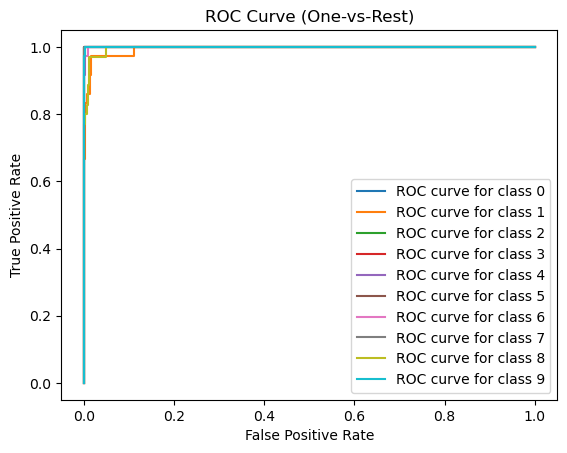

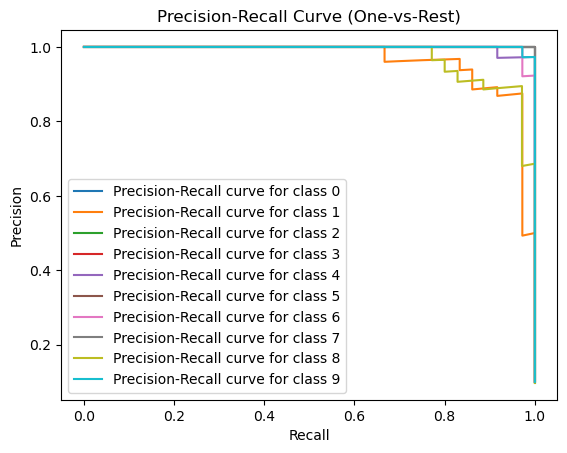

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Step 1: Scaling
    ('classifier', LogisticRegression())  # Step 2: Logistic Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# ROC AUC score using 'ovr' (One-vs-Rest) strategy for multi-class
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve for each class (for visualization, we'll focus on one-vs-rest approach)
fpr = {}
tpr = {}
for i in range(len(np.unique(y_test))):  # For each class
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])

plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision = {}
recall = {}
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])

plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve for class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc="lower left")
plt.show()


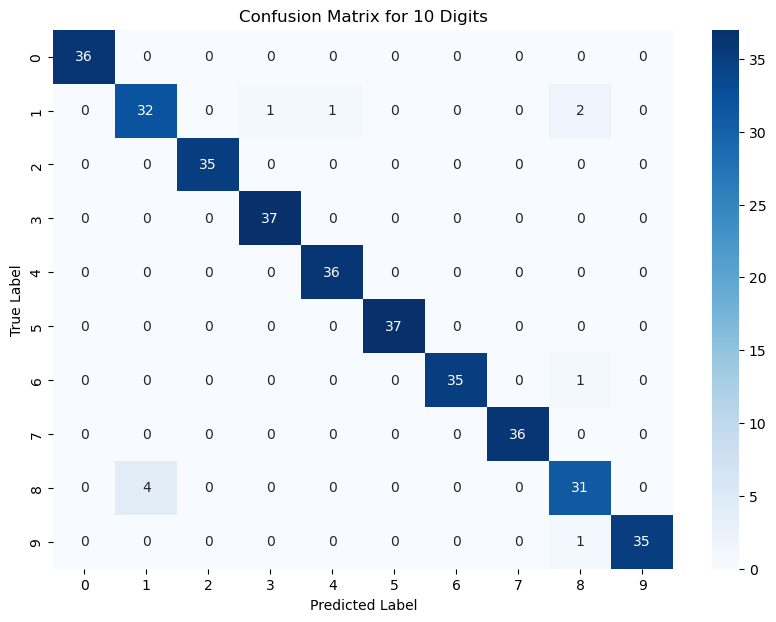

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for 10 Digits')
plt.show()
